# Minimization condition for the elektroweak symmetry breaking

from equations (8.1.3) and (8.1.4) from the [Susy Primer](https://arxiv.org/pdf/hep-ph/9709356) by Stephen P. Martin a minimization condition for the elektroweak symmetry breaking arises from the coupling of the up and down type Higgs doublets in the scalar potential. This Notebook tries to illustrate this condition for some ranges of the Higgs mass parameters

### Scalar potential

$$
V = (|\mu|^2 + m_{H_u}^2)|H_u^0|^2 + (|\mu|^2 + m_{H_d}^2)|H_d^0|^2 - (b H_u^0 H_d^0 + c.c.) \\
 + \frac{1}{8} (g^2 + g'^2)(|H_u^0|^2 - |H_d^0|^2)^2
$$

### minimalisation condition

$$
2b < 2 |\mu|^2 + m_{H_u}^2 + m_{H_D}^2
$$

$$
b^2 > (|\mu|^2 + m_{H_u}^2)(|\mu|^2 + m_{H_d}^2)
$$

Since the elektroweak symmetry breaking states that the VEVs of the Higgs doublets must be non zero ($tan \beta = v_u / v_d$) the minimization condition can be connectected to the mass of the Z-Boson $m_Z$ which is explained in the Susy primer. Then rewriting equations (8.1.10) and (8.1.11) gives

$$
|\mu|^2 = \frac{1}{2} \left(\frac{|m_{H_d}^2 - m_{H_u}^2|}{\sqrt{1 - sin^2(2 \beta)}} - m_{H_u}^2 - m_{H_d}^2 - m_Z^2 \right) 
$$

$$
b = \frac{sin(2 \beta)}{2} (m_{H_u}^2 + m_{H_d}^2 + 2|\mu|^2)
$$

from where $\mu$ and b can be calculated. In the following the Notebook will take randomly sampled points for the three input parameters $m_{H_u}$, $m_{H_d}$ and $tan \beta$ and will calculate the respective results for $\mu$ and $b$. while also checking if the minimization condition is met

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import corner

In [30]:
# ranges from a MSSM7 GAMBIT scan
m_Hu_o = [-3e6, 1000]
m_Hd_o = [-1000, 3e6]
tan_b = [3, 70]
mZ = 91.1876

# ranges with m_Hu > m_Hd
m_Hu_f = [-1000, 3e6]
m_Hd_f = [-3e6, 1000]


# ranges with m_Hu = m_Hd
m_Hu_e = [-3e6, 1000]
m_Hd_e = [-3e6, 1000]

parameter_set_list = [
    (m_Hu_o, m_Hd_o),
    (m_Hu_e, m_Hd_e),
    (m_Hu_f, m_Hd_f)
]


In [12]:
# calcutaing the sin(2beta)
def calculate_sin_2b(tan_b: float) -> float:
    """Calculate sin(2beta) from tan(beta)."""
    return np.sin(2 * np.arctan(tan_b))


In [33]:
# create random samples
def sample(start: float, end: float, n: int) -> np.ndarray:
    """Generate n random samples between start and end."""
    return np.random.uniform(start, end, n)

parameter_dict_list = []

for pset in parameter_set_list:
    input_dict = {
        "m_Hu": sample(pset[0][0], pset[0][1], 1000),
        "m_Hd": sample(pset[1][0], pset[1][1], 1000),
        "tan_b": sample(tan_b[0], tan_b[1], 1000),
    }
    input_dict["sin_2b"] = calculate_sin_2b(input_dict["tan_b"])
    parameter_dict_list.append(input_dict)



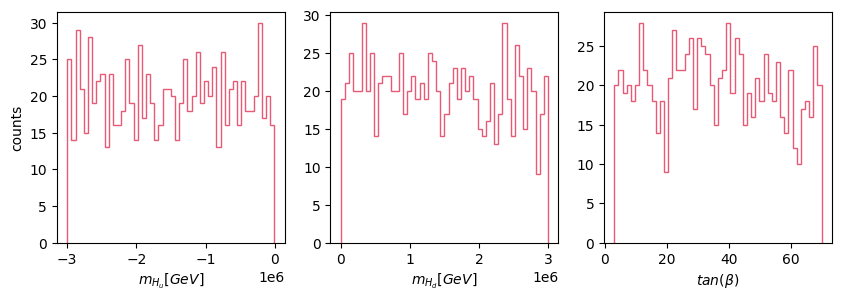

In [34]:
# create a figure plot for the input parameters to see the prior distribution
fig = plt.figure(figsize=(10, 3))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.set_ylabel("counts")
ax1.set_xlabel("$m_{H_u}$$ [GeV]$")
ax2.set_xlabel("$m_{H_d}$$ [GeV]$")
ax3.set_xlabel("$tan(\\beta)$")

# ax1.set_xlim(m_Hu[0], m_Hu[1])
# ax2.set_xlim(m_Hd[0], m_Hd[1])
# ax3.set_xlim(tan_b[0], tan_b[1])

ax1.hist(parameter_dict_list[0]["m_Hu"], bins=50, color="crimson", alpha=0.7, histtype='step')
ax2.hist(parameter_dict_list[0]["m_Hd"], bins=50, color="crimson", alpha=0.7, histtype='step')
ax3.hist(parameter_dict_list[0]["tan_b"], bins=50, color="crimson", alpha=0.7, histtype='step')

plt.show()



In [15]:
# calculate |mu|^2
def calculate_mu_p2(m_Hu: float, m_Hd: float, sin_2b:float, mZ:float) -> float:
    """Calculate |mu|^2 from m_Hu, m_Hd, sin(2beta), and mZ."""
    return 0.5 * ((np.abs(m_Hd**2 - m_Hu**2))/(np.sqrt(1 - sin_2b**2)) - m_Hu**2 - m_Hd**2 - mZ**2)


In [16]:
# calculate b
def calculate_b(m_Hu: float, m_Hd: float, sin_2b: float) -> float:
    """Calculate b from m_Hu, m_Hd, and sin(2beta)."""
    mu_p2 = calculate_mu_p2(m_Hu, m_Hd, sin_2b, mZ)
    return 0.5 * sin_2b * (m_Hu**2 + m_Hd**2 + 2*mu_p2)

In [48]:
mu = [calculate_mu_p2(parameter_dict["m_Hu"], parameter_dict["m_Hd"], parameter_dict["sin_2b"], mZ)
      for parameter_dict in parameter_dict_list]
b = [calculate_b(parameter_dict["m_Hu"], parameter_dict["m_Hd"], parameter_dict["sin_2b"])
      for parameter_dict in parameter_dict_list]

# collect all mu^2 which are positive and declare them as valid
valid_mask = [mu[i] > 0 for i in range(len(mu))]
valid_mu = [mu[i][valid_mask[i]] for i in range(len(mu))]


In [49]:
colors = ['darkred', 'darkgreen', 'darkblue']
cmaps = ['Reds', 'Greens', 'Blues']
labels = [
    "$m_{H_u} < m_{H_u}$",
    "$m_{H_u} = m_{H_u}$",
    "$m_{H_u} > m_{H_u}$",
]

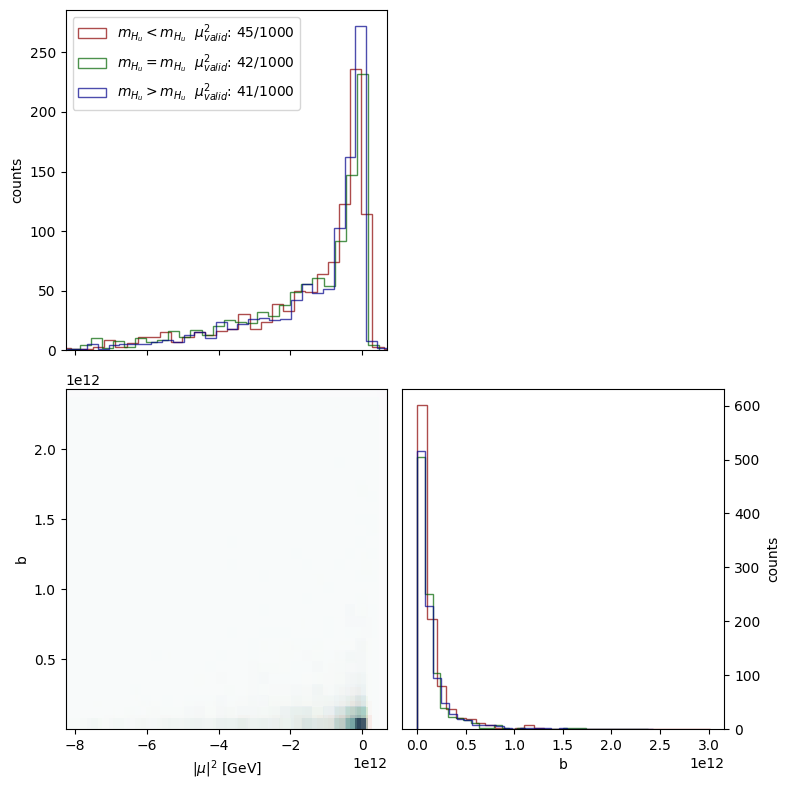

In [50]:
# plot the results
fig = plt.figure(figsize=(8,8))
hist1 = fig.add_subplot(221)
hist2 = fig.add_subplot(224)
ax3 = fig.add_subplot(223, sharex=hist1)

hist1.set_ylabel("counts")
hist1.tick_params('x', labelbottom=False)
hist2.set_xlabel("b")
hist2.yaxis.tick_right()
hist2.yaxis.set_label_position("right")
hist2.set_ylabel("counts")
ax3.set_xlabel("$|\\mu|^2$ [GeV]")
ax3.set_ylabel("b")

for i in range(len(mu)):
    hist1.hist(mu[i],  bins=30, color=colors[i], alpha=0.7, histtype='step',
               label=labels[i] + "  $\\mu^2_{valid}$: " + f"{len(valid_mu[i])}/{len(mu[i])}")
    hist2.hist(b[i],  bins=30, color=colors[i], alpha=0.7, histtype='step')
    ax3.hist2d(mu[i], b[i], bins=30, cmap=cmaps[i], alpha=0.5)


hist1.legend()
fig.tight_layout()

plt.show()

fig.savefig("./plots/minimization_mu_b_plot.png", dpi=300, bbox_inches='tight')